In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle
from joblib import dump,load
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score
import shap
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingClassifier

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seen='./dataset/seen_split/'
unseen='./'

# SHAP

In [3]:
X=pd.read_csv(unseen+str(0)+'train_encode.csv')
X=X.loc[:,~X.columns.str.match("Unnamed")]
val=pd.read_csv(unseen+str(0)+'val_encode.csv').reindex(columns=X.columns)
val=val.fillna(0)
X=X.append(val)
vlabel=pd.read_csv(unseen+str(0)+'val_label.csv')['label']
y=pd.read_csv(unseen+str(0)+'train_label.csv')['label']
y=y.append(vlabel)
testlabel=pd.read_csv(unseen+str(0)+'test_label.csv')['label']
test=pd.read_csv(unseen+str(0)+'test_encode.csv').reindex(columns=X.columns)
test=test.fillna(0)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [4]:
test.columns=test.columns.str.replace("_x","_1")
test.columns=test.columns.str.replace("_y","_2")
X.columns=X.columns.str.replace("_x","_1")
X.columns=X.columns.str.replace("_y","_2")

{'class_weight': {1: 30}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 100}
the f1 score is 0.37499999999999994


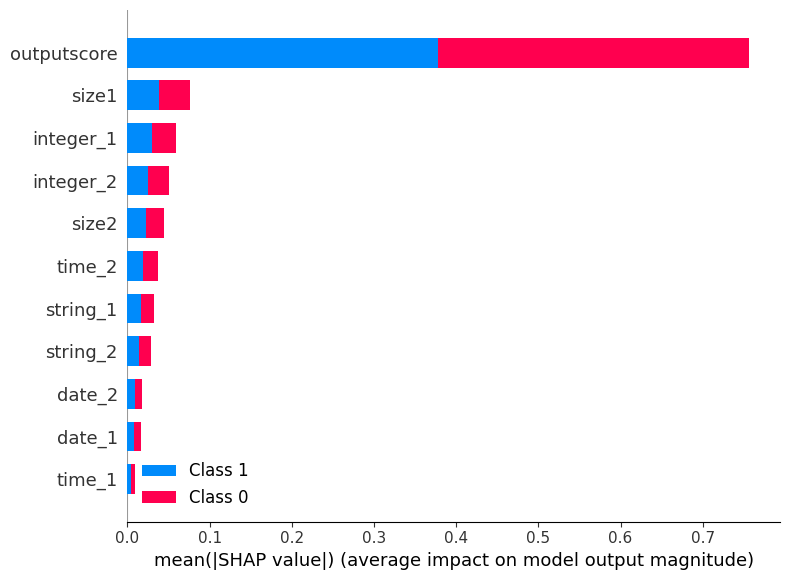

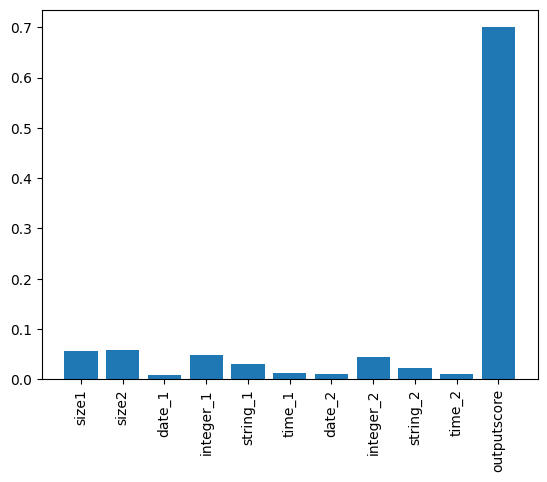

In [5]:
with open('./model_good/'+str(0)+'model_pkl' , 'rb') as f:
    model=pickle.load(f)
    print(model.best_params_)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False,max_depth=model.best_params_['max_depth'],min_samples_leaf=model.best_params_['min_samples_leaf'],class_weight=model.best_params_['class_weight'], n_estimators=model.best_params_['n_estimators'])
    clf.fit(X,y)
    pre=clf.predict(test)
    print('the f1 score is',f1_score(testlabel,pre))
    shap_values = shap.TreeExplainer(clf).shap_values(X)
#     print(shap_values)

    shap.summary_plot(shap_values, X)
#     shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)
    pyplot.xticks( rotation='vertical')
    importance = clf.feature_importances_
    pyplot.bar(X.columns, importance)

In [37]:
##unseen partition

In [5]:
X=pd.read_csv(unseen+str(0)+'train_encode.csv')
X=X.loc[:,~X.columns.str.match("Unnamed")]
val=pd.read_csv(unseen+str(0)+'val_encode.csv').reindex(columns=X.columns)
val=val.fillna(0)
X=X.append(val)
vlabel=pd.read_csv(unseen+str(0)+'val_label.csv')['label']
y=pd.read_csv(unseen+str(0)+'train_label.csv')['label']
y=y.append(vlabel)
testlabel=pd.read_csv(unseen+str(0)+'test_label.csv')['label']
test=pd.read_csv(unseen+str(0)+'test_encode.csv').reindex(columns=X.columns)
test=test.fillna(0)
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,max_depth=10, random_state=0).fit(X, y)
clf=RandomForestClassifier(max_depth=20, class_weight={1:40},min_samples_leaf=30,random_state=0).fit(X,y)
pre=clf.predict(test)
print(sum(pre))
print(sum(testlabel))
print('the f1 score is',f1_score(testlabel,pre))

14
5
the f1 score is 0.3157894736842105


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [13]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'train_encode.csv')
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(unseen+str(i)+'val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False)
    n_estimators=[50,70,100,200]
    ones=[10,20,30,35,40,50,100,200]
    minSampleLeaf=[20,30,50,80,100,200]
    max_depth=[10,15,20]
    
    parameter={'max_depth':max_depth,'n_estimators':n_estimators,'min_samples_leaf':minSampleLeaf,'class_weight':[{1:classOne} for classOne in ones ]}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'model/'+str(i)+'model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  outputscore  
0           1       0     0.028364  
1

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  outputscore  
0           1       0     0.140604  
1

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  outputscore  
0           1       0     0.404519  
1

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  outputscore  
0           1       0     0.352482  
1

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  outputscore  
0           1       0     0.427936  
1

In [5]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'model_good/'+str(i)+'model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'train_encode.csv')
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of Thalia is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

12
5
the f1 score is 0.47058823529411764
the precision score is 0.3333333333333333
the recall score is  0.8
{'class_weight': {1: 30}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 100}
0.5657895097279935
8
5
the f1 score is 0.3076923076923077
the precision score is 0.25
the recall score is  0.4
{'class_weight': {1: 30}, 'max_depth': 10, 'min_samples_leaf': 20, 'n_estimators': 70}
0.54698647636668
32
5
the f1 score is 0.21621621621621623
the precision score is 0.125
the recall score is  0.8
{'class_weight': {1: 30}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 50}
0.2833888691953208
24
5
the f1 score is 0.3448275862068966
the precision score is 0.20833333333333334
the recall score is  1.0
{'class_weight': {1: 30}, 'max_depth': 20, 'min_samples_leaf': 20, 'n_estimators': 70}
0.29554000074986086
15
5
the f1 score is 0.3
the precision score is 0.2
the recall score is  0.6
{'class_weight': {1: 30}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 50}
0.2460803

In [8]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'train_encode.csv').reindex(columns=['outputscore'])
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(unseen+str(i)+'val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False)
    n_estimators=[60,70,100,200]
    ones=[2,5,10,20,30,35]
    minSampleLeaf=[20,30,50,80]
    max_depth=[10,15,20,5]
    parameter={'max_depth':max_depth,'n_estimators':n_estimators,'min_samples_leaf':minSampleLeaf,'class_weight':[{1:classOne} for classOne in ones ]}
    clfG.fit(X,y)
    with open(unseen+'model/'+str(i)+'output_model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     outputscore
0       0.028364
1       0.512961
2       0.005732
3       0.573920
4       0.563626
..           ...
111     0.004195
112     0.044107
113     0.002990
114     0.038827
115     0.052818

[871 rows x 1 columns]


KeyboardInterrupt: 

In [10]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'model/'+str(i)+'output_model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'train_encode.csv').reindex(columns=['outputscore'])
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

12
5
the f1 score is 0.35294117647058826
the precision score is 0.25
the recall score is  0.6
{'class_weight': {1: 30}, 'max_depth': 10, 'min_samples_leaf': 100, 'n_estimators': 50}
0.4077314062394362
24
5
the f1 score is 0.27586206896551724
the precision score is 0.16666666666666666
the recall score is  0.8
{'class_weight': {1: 30}, 'max_depth': 10, 'min_samples_leaf': 20, 'n_estimators': 50}
0.4060184508586044
43
5
the f1 score is 0.041666666666666664
the precision score is 0.023255813953488372
the recall score is  0.2
{'class_weight': {1: 35}, 'max_depth': 10, 'min_samples_leaf': 20, 'n_estimators': 50}
0.20978514555358485
49
5
the f1 score is 0.1851851851851852
the precision score is 0.10204081632653061
the recall score is  1.0
{'class_weight': {1: 30}, 'max_depth': 10, 'min_samples_leaf': 200, 'n_estimators': 50}
0.228085295402713
35
5
the f1 score is 0.049999999999999996
the precision score is 0.02857142857142857
the recall score is  0.2
{'class_weight': {1: 30}, 'max_depth': 10,

In [37]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'train_encode.csv').drop(columns=['outputscore'])
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(unseen+str(i)+'val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False)
    n_estimators=[60,70,100,200]
    ones=[2,5,10,20,30,35]
    minSampleLeaf=[20,30,50,80]
    max_depth=[10,15,20,5]
    parameter={'max_depth':max_depth,'n_estimators':n_estimators,'min_samples_leaf':minSampleLeaf,'class_weight':[{1:classOne} for classOne in ones ]}
    clfG.fit(X,y)
    with open(unseen+'model/'+str(i)+'constraint_model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  
0           1       0  
1           0       0  
2  

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  
0           1       0  
1           0       0  
2  

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  
0           1       0  
1           0       0  
2  

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  
0           1       0  
1           0       0  
2  

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     size1  size2  date_x  integer_x  string_x  time_x  date_y  integer_y  \
0        3      3       0          0         1       0       0          0   
1        3      4       0          0         1       0       1          0   
2        3     15       0          0         1       0       0          0   
3        3     12       0          0         1       0       0          0   
4        3      8       0          0         1       0       0          0   
..     ...    ...     ...        ...       ...     ...     ...        ...   
111     45      3       0          1         0       0       0          0   
112     45      4       0          1         0       0       1          0   
113     45     15       0          1         0       0       0          0   
114     45     12       0          1         0       0       0          0   
115     45      8       0          1         0       0       0          0   

     string_y  time_y  
0           1       0  
1           0       0  
2  

In [38]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'model/'+str(i)+'constraint_model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'train_encode.csv').drop(columns=['outputscore'])
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

47
5
the f1 score is 0.1923076923076923
the precision score is 0.10638297872340426
the recall score is  1.0
{'class_weight': {1: 30}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 50}
0.272097432436775
43
5
the f1 score is 0.16666666666666666
the precision score is 0.09302325581395349
the recall score is  0.8
{'class_weight': {1: 30}, 'max_depth': 20, 'min_samples_leaf': 20, 'n_estimators': 50}
0.28444710464294304
47
5
the f1 score is 0.1923076923076923
the precision score is 0.10638297872340426
the recall score is  1.0
{'class_weight': {1: 30}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 100}
0.2678120702826585
47
5
the f1 score is 0.1923076923076923
the precision score is 0.10638297872340426
the recall score is  1.0
{'class_weight': {1: 30}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 70}
0.2905876392471014
47
5
the f1 score is 0.1923076923076923
the precision score is 0.10638297872340426
the recall score is  1.0
{'class_weight': {1: 30}, 'max_dep